# Competitor's Moving Average Normalized
## Description
For the target company we take the average stock price of similar companies during any number of days and normalize the time series. The difference between the target company and the CMAN will tell us if it's overpriced relatively to its competitors.
## Limitations
* The sources from which these competitors are retrieved (Finviz or Polygon) often choose some tickers that are young relatively to our target so we have to observe the strategy on a short timeframe if we don't want backfilled data.
* The library does not offer the option to differentiate the nationality of the competitors.

In [74]:
from openbb_terminal.sdk import openbb as obb
import yfinance as yf

In [75]:
#Inputs
target="GM"
days=30
#Choose from Finnhub or Polygon
source="Finnhub"

In [76]:
#Creates a list of similar stocks relatively to the target
similar = obb.stocks.ca.similar(target, source)

In [81]:
##Polishes the data

#Polygon does not add the target's ticker
if source=="Polygon":
    similar.append(target)

#Creates a list with each ticker's trading date.
dates=[]
for i in range(len(similar)):
    dates.append(yf.Ticker(similar[i]).history(period="max").index[0].date())

#Sorts it
dates.sort()

In [78]:
#Builds a dataframe with the similar stocks, takes the oldest date in which all the stocks were public.
hist = obb.stocks.ca.hist(similar, dates[-1])

#Normalizes it
hist = (hist-hist.min())/(hist.max()-hist.min())

#Adds a column with the competitor's rolling average over the specified time frame
if (days>1):
    hist["CMAN"]=(hist.drop(target, axis=1).mean(axis=1).rolling(window=days).mean())

#Adds a moving average for reference
hist["MA"]=(hist[target].rolling(window=days).mean())

<Axes: xlabel='Date'>

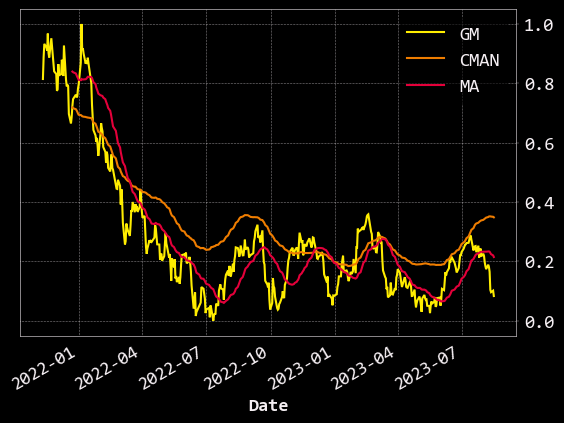

In [79]:
graph=hist[[target,"CMAN","MA"]]
graph.plot(kind='line')